## Question 3C
Take grayscale image of size $512\times512$, add some salt & pepper noise and apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

In [2]:
def add_noise(input):
    row, col = input.shape

    # adding some salt
    number_of_pixel = random.randint(3000, 5000)
    for i in range(number_of_pixel):
        y_cor = random.randint(0, row-1)
        x_cor = random.randint(0, col-1)
        input[y_cor][x_cor] = 255
    # adding some peeper
    for i in range(number_of_pixel):
        y_cor = random.randint(0, row-1)
        x_cor = random.randint(0, col-1)
        input[y_cor][x_cor] = 0

    return input

## Geometric Mean Filtering
Let, an array $A=[x_1, x_2, x_3, ..., x_n]$ where $n$ = size of $A$ then, Geometric Mean ($GM$) can be calculated as follows:
$$GM = \sqrt[n]{x_1 \times x_2 \times x_3 \times \dots \times x_n}$$

In [3]:
def get_geometric_mean_image(image, dimension):
    mask_x = dimension
    mask_y = dimension

    height, width = image.shape
    gmean_image = np.zeros((height, width), dtype=np.uint8)
    temp_image_segment = np.zeros((mask_x, mask_y), dtype=np.float32)

    for i in range(0, height):
        for j in range(0, width):
            for l in range(0, mask_x):
                for r in range(0, mask_y):
                    temp_image_segment[l, r] = image[(i-(mask_x//2)+l)%height, (j-(mask_y//2)+r)%width]
                    if temp_image_segment[l, r]==0:
                        temp_image_segment[l, r] = 0

            gmean_image[i, j] = np.prod(temp_image_segment)**(1/(mask_x*mask_y))
    
    return gmean_image

## Harmonic Mean Filtering
Let, an array $A=[x_1, x_2, x_3, ..., x_n]$ where $n$ = size of $A$ then, Harmonic Mean ($HM$) can be calculated as follows:
$$HM = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\frac{1}{x_3}+\dots+\frac{1}{x_n}}$$

In [9]:
def get_harmonic_mean_image(image, dimension):
    mask_x = dimension
    mask_y = dimension

    height, width = image.shape
    hmean_image = np.zeros((height, width), dtype=np.uint8)
    temp_image_segment = np.zeros((mask_x, mask_y), dtype=np.float32)

    for i in range(0, height):
        for j in range(0, width):
            for l in range(0, mask_x):
                for r in range(0, mask_y):
                    temp_image_segment[l, r] = image[(i-(mask_x//2)+l)%height, (j-(mask_y//2)+r)%width]
                    if temp_image_segment[l, r]==0:
                        temp_image_segment[l, r] = 1

            hmean_image[i, j] = (mask_x*mask_y)/np.sum(1/temp_image_segment)
    
    return hmean_image

### PSNR (Peak Signal to Noise Ratio)
PSNR can be calculate as follows:
$$PSNR = 10 \times log{_{10}}{\frac{(max\_pixel\_value)^2}{MSE}}$$
and MSE (Mean Squared Error) can be calculated as follows:
$$MSE=\frac{1}{n}\sum_{i = 1}^{n}(x_i-\hat{x}_i)^2$$
where,  
$x_i$ = $i$-th pixel of original image  
$\hat{x}_i$ = $i$-th pixel of filtered image

In [10]:
def calculate_psnr(original_img, processed_img):
    original_img = original_img.astype(np.float64)
    processed_img = processed_img.astype(np.float64)
    max_pixel_value = 255
    mse = np.mean((original_img - processed_img) ** 2)
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

In [11]:
original_image = plt.imread("lena_gray_512.tif").copy()
noisy_image = add_noise(original_image.copy())
gmean_image = get_geometric_mean_image(original_image.copy(), 3)
hmean_image = get_harmonic_mean_image(original_image.copy(), 3)

In [12]:
# calculate PSNR
noisy_psnr = calculate_psnr(original_image, noisy_image)
gmean_psnr = calculate_psnr(original_image, gmean_image)
hmean_psnr = calculate_psnr(original_image, hmean_image)

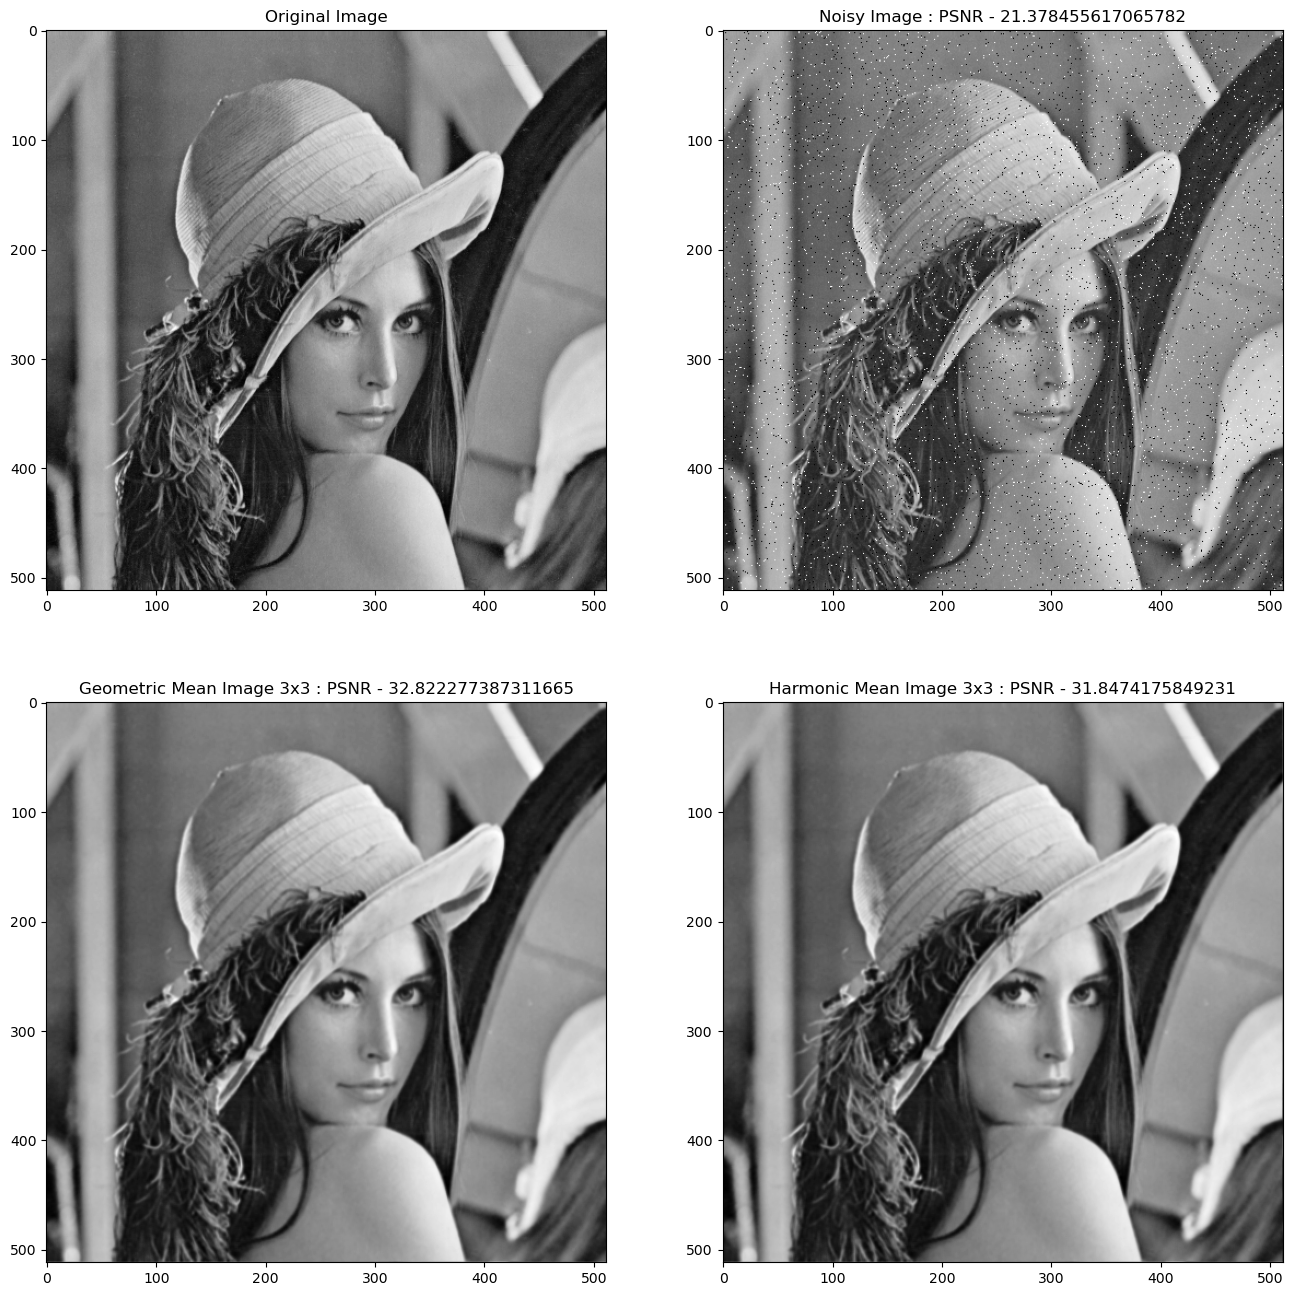

In [13]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.subplot(222)
plt.imshow(noisy_image, cmap="gray")
plt.title("Noisy Image : PSNR - "+str(noisy_psnr))
plt.subplot(223)
plt.imshow(gmean_image, cmap="gray")
plt.title("Geometric Mean Image 3x3 : PSNR - "+str(gmean_psnr))
plt.subplot(224)
plt.imshow(gmean_image, cmap="gray")
plt.title("Harmonic Mean Image 3x3 : PSNR - "+str(hmean_psnr))
plt.show()